In [1011]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим датасеты для обучения и тестирования

In [1012]:
DATA_PATH = "D:\PythonLearn\ML-Labs\Lab_02\data\\train.csv"
df = pd.read_csv(DATA_PATH)

DATA_PATH_TEST = "D:\PythonLearn\ML-Labs\Lab_02\data\\test.csv"
df_test = pd.read_csv(DATA_PATH_TEST)

df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


Посмотрим, для каких атрибутов необходимо сделать приведение типов

In [1014]:
df.info()

#Надо что-то сделать с ApplicationDate, MartialStatus, HomeOwnershipStatus, LoanPurpose, EmploymentStatus, EducationLevel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

Приведём ApplicationDate к datetime, распарсим и удалим

In [1015]:
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')
df_test['ApplicationDate'] = pd.to_datetime(df_test['ApplicationDate'], errors='coerce')

df['ApplicationYear'] = df['ApplicationDate'].dt.year
df['ApplicationMonth'] = df['ApplicationDate'].dt.month
df['ApplicationDayOfMonth'] = df['ApplicationDate'].dt.day

df_test['ApplicationYear'] = df_test['ApplicationDate'].dt.year
df_test['ApplicationMonth'] = df_test['ApplicationDate'].dt.month
df_test['ApplicationDayOfMonth'] = df_test['ApplicationDate'].dt.day

df = df.drop('ApplicationDate', axis=1)
df_test = df_test.drop('ApplicationDate', axis=1)

One-Hot Encoding для MartialStatus, HomeOwnershipStatus, LoanPurpose, EmploymentStatus, EducationLevel

In [1016]:
df = pd.get_dummies(df, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'], drop_first=True)

df_test = pd.get_dummies(df_test, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'], drop_first=True)

Имеем после преобразований

In [1017]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             10487 non-null  float64
 1   AnnualIncome                    10487 non-null  float64
 2   CreditScore                     9986 non-null   float64
 3   LoanAmount                      9986 non-null   float64
 4   LoanDuration                    10487 non-null  float64
 5   NumberOfDependents              10487 non-null  float64
 6   MonthlyDebtPayments             9986 non-null   float64
 7   CreditCardUtilizationRate       10487 non-null  float64
 8   NumberOfOpenCreditLines         10487 non-null  float64
 9   NumberOfCreditInquiries         10487 non-null  float64
 10  DebtToIncomeRatio               10487 non-null  float64
 11  BankruptcyHistory               9986 non-null   float64
 12  PreviousLoanDefaults            

Удалим дубликаты записей из датафрейма для трейна

In [1018]:
df = df.drop_duplicates()

Посмотрим на значимые пропуски в столбцах и их количества

In [1019]:
df.isnull().sum()

Age                                 1
AnnualIncome                        1
CreditScore                       472
LoanAmount                        472
LoanDuration                        1
NumberOfDependents                  1
MonthlyDebtPayments               472
CreditCardUtilizationRate           1
NumberOfOpenCreditLines             1
NumberOfCreditInquiries             1
DebtToIncomeRatio                   1
BankruptcyHistory                 472
PreviousLoanDefaults                1
PaymentHistory                      1
LengthOfCreditHistory               1
SavingsAccountBalance               1
CheckingAccountBalance            472
TotalAssets                       472
TotalLiabilities                    1
MonthlyIncome                       1
UtilityBillsPaymentHistory          1
JobTenure                           1
Experience                          1
NetWorth                          472
BaseInterestRate                  472
InterestRate                        1
MonthlyLoanP

Удалим все строки с пропусками

In [1020]:
df.dropna(how='any', inplace=True)

#Число строк с пропусками составляет около 5 процентов от общего числа строк
#Это небольшая доля от общего числа записей в дата-фрейме
#Также экспериментально было установлено, что при удалении всех записей с пропусками имеем лучший MSE

Визуализируем матрицу корреляций с помощью HeatMap

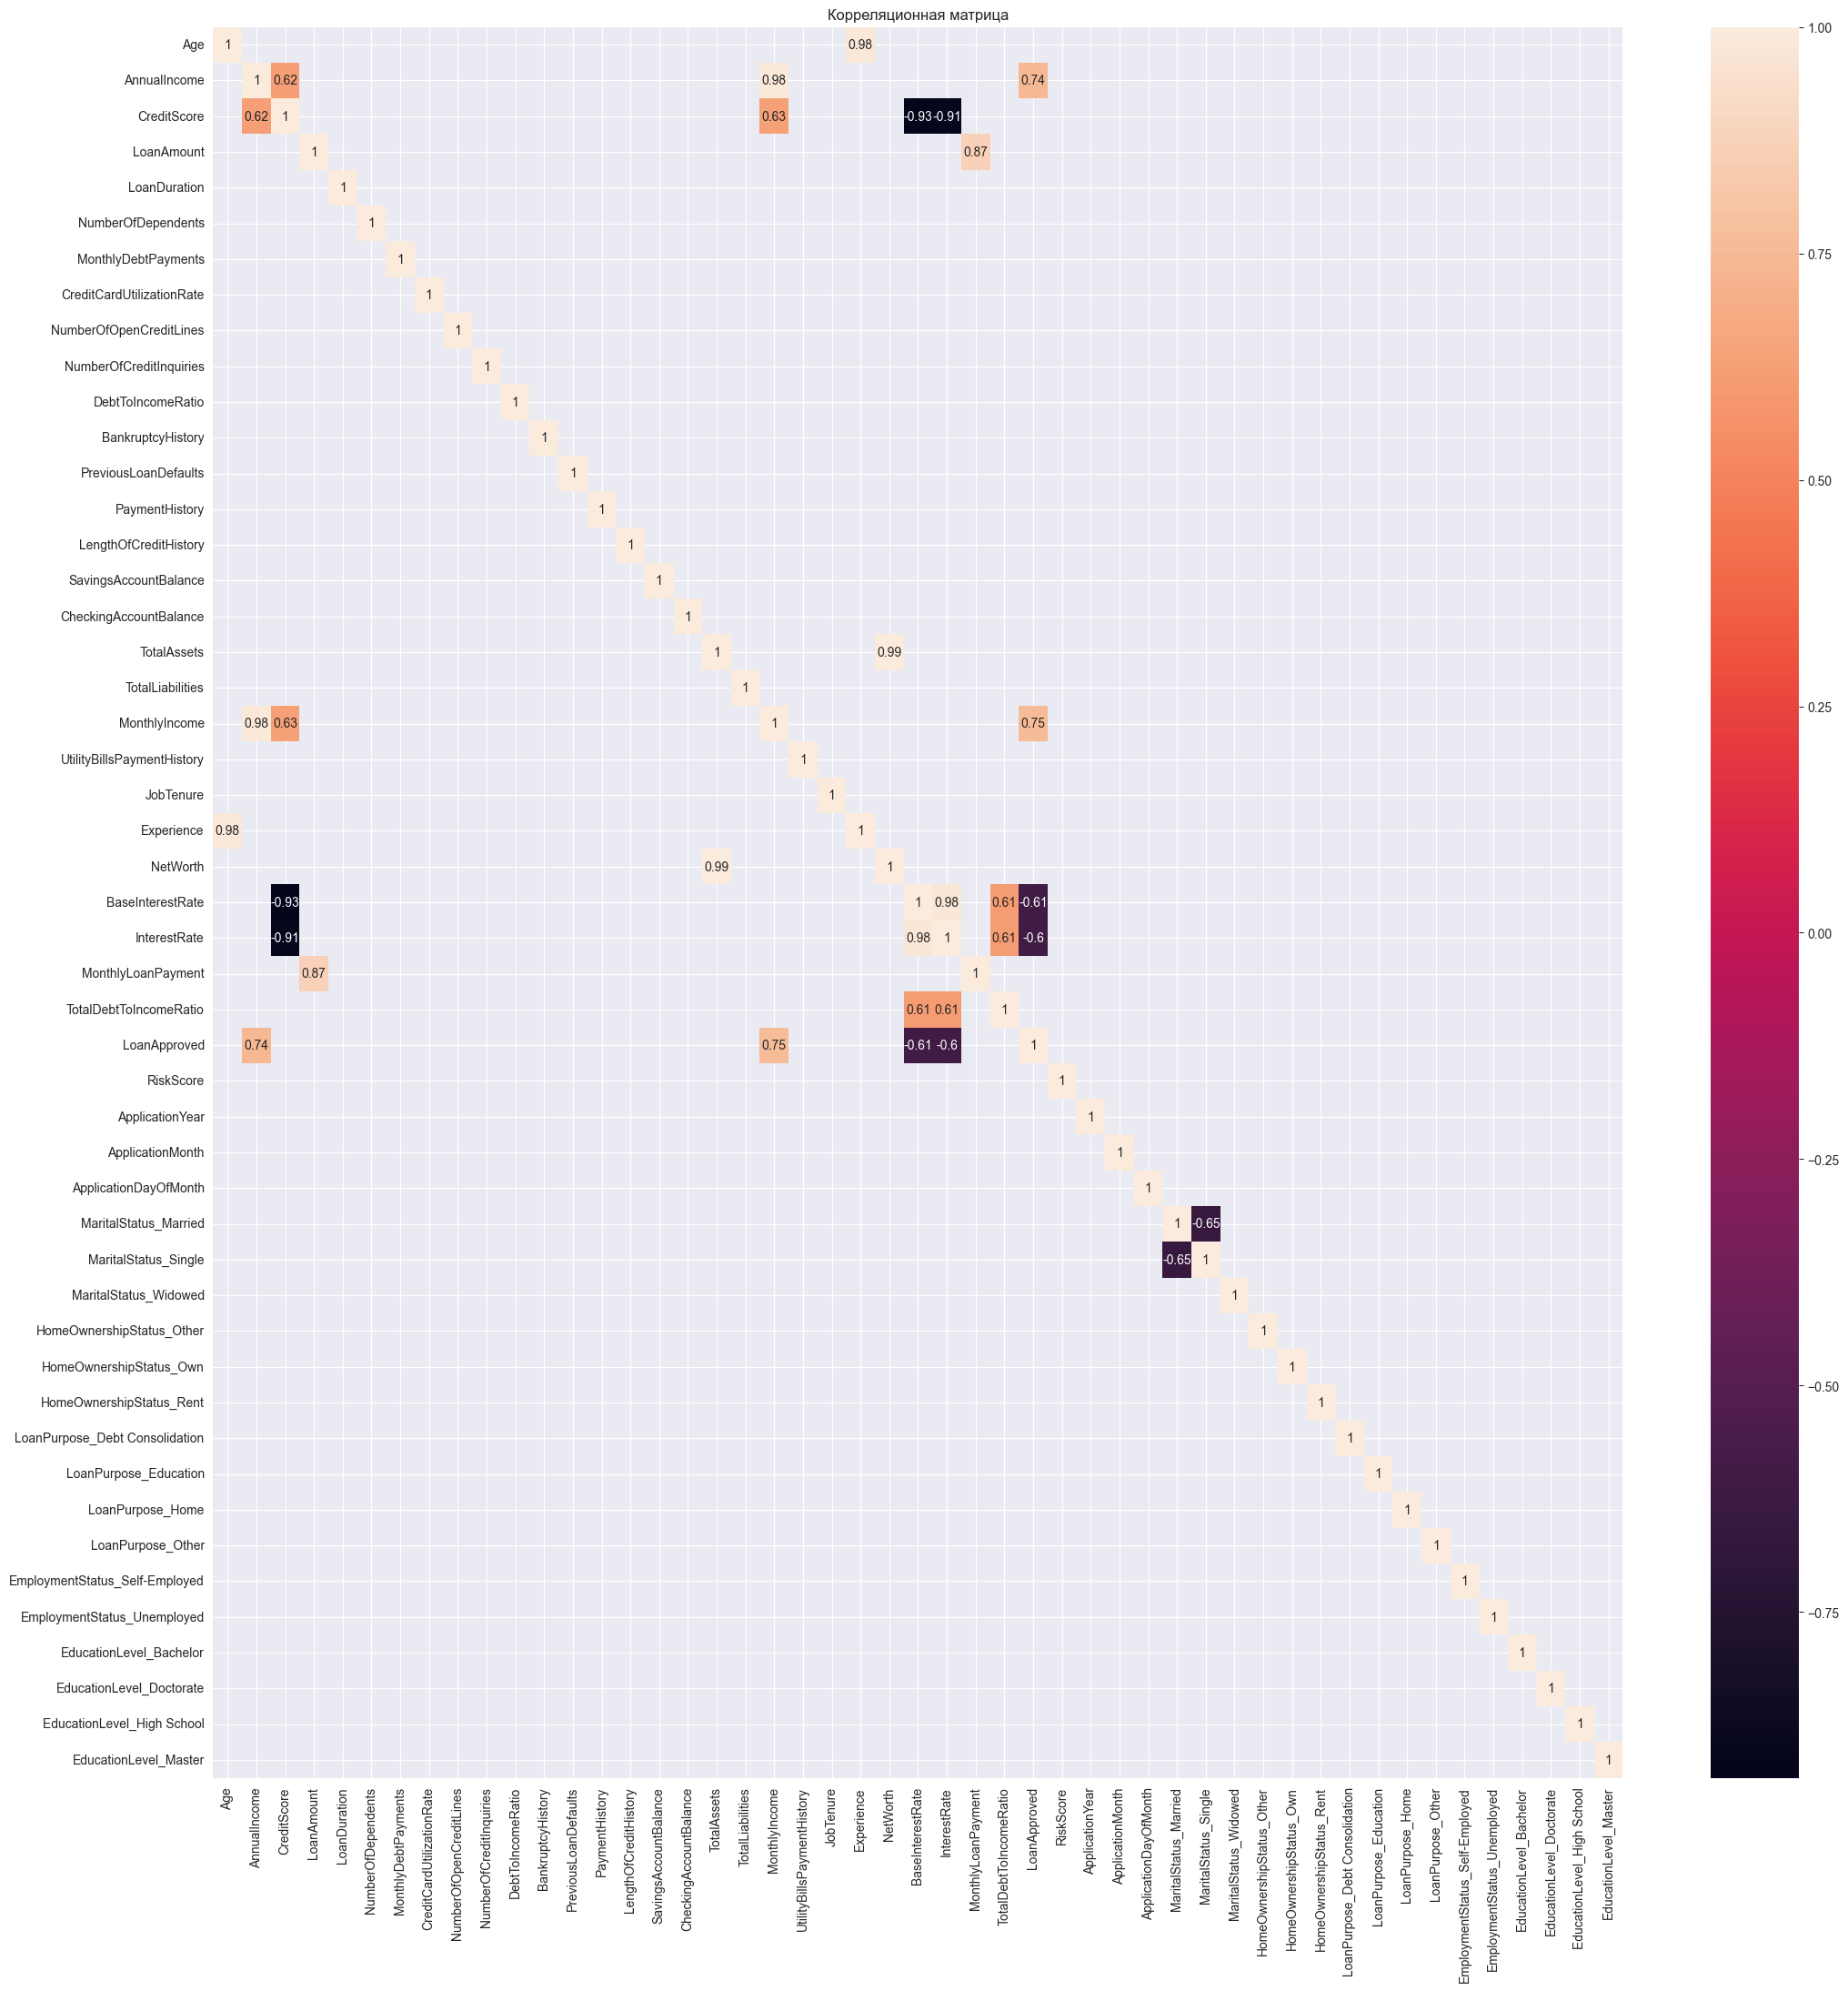

In [1021]:
corr_matrix = df.corr()

#Будем отображать зависимости начиная с умеренно сильной корреляцией (>=0.6)

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix[corr_matrix.abs() >= 0.6], annot=True)
plt.title("Корреляционная матрица")
plt.show()

Обработка коррелирующих признаков

In [1022]:
#Рассмотрим признаки с сильной корреляцией (>=0.7)

high_corr = corr_matrix[(corr_matrix.abs() >= 0.7) & (corr_matrix != 1.0)].stack()
print(high_corr)

#Удалим подходящие признаки, стараясь по необходимости оставлять категориальные
df = df.drop(
    [
        'Experience',
        'MonthlyIncome',
        'AnnualIncome', 
        'BaseInterestRate',
        'InterestRate',
        'MonthlyLoanPayment',
        'TotalAssets'
    ],
    axis=1
)

df_test = df_test.drop(
    [
        'Experience',
        'MonthlyIncome',
        'AnnualIncome', 
        'BaseInterestRate',
        'InterestRate',
        'MonthlyLoanPayment',
        'TotalAssets'
    ],
    axis=1
)

Age                 Experience            0.982835
AnnualIncome        MonthlyIncome         0.984377
                    LoanApproved          0.742279
CreditScore         BaseInterestRate     -0.932792
                    InterestRate         -0.909006
LoanAmount          MonthlyLoanPayment    0.868396
TotalAssets         NetWorth              0.993873
MonthlyIncome       AnnualIncome          0.984377
                    LoanApproved          0.754917
Experience          Age                   0.982835
NetWorth            TotalAssets           0.993873
BaseInterestRate    CreditScore          -0.932792
                    InterestRate          0.975232
InterestRate        CreditScore          -0.909006
                    BaseInterestRate      0.975232
MonthlyLoanPayment  LoanAmount            0.868396
LoanApproved        AnnualIncome          0.742279
                    MonthlyIncome         0.754917
dtype: float64


Нормализуем признаки

In [1023]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
scaler_min_max = MinMaxScaler()

Нормализуем ApplicationYear

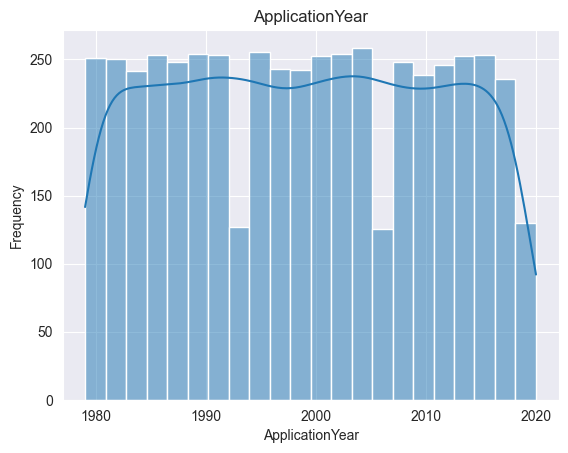

In [1024]:
sns.histplot(df['ApplicationYear'], kde=True, stat='frequency')
plt.title('ApplicationYear')
plt.show()

#Распределение примерно равномерное, используем min-max нормализацию

df['ApplicationYear'] = scaler_min_max.fit_transform(df[['ApplicationYear']])
df_test['ApplicationYear'] = scaler_min_max.fit_transform(df_test[['ApplicationYear']]) 

Нормализуем ApplicationMonth

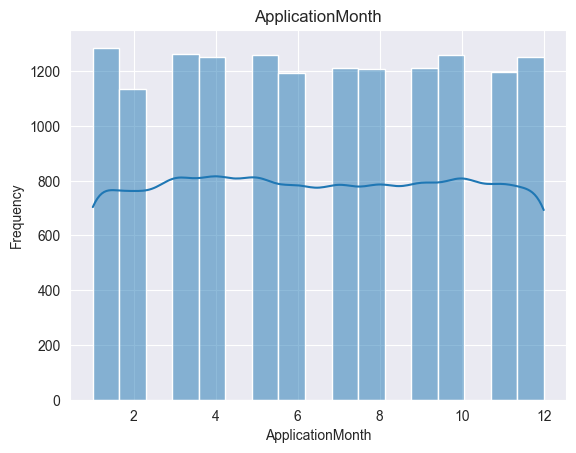

In [1025]:
sns.histplot(df['ApplicationMonth'], kde=True, stat='frequency')
plt.title('ApplicationMonth')
plt.show()

#Распределение примерно равномерное, используем min-max нормализацию

df['ApplicationMonth'] = scaler_min_max.fit_transform(df[['ApplicationMonth']])
df_test['ApplicationMonth'] = scaler_min_max.fit_transform(df_test[['ApplicationMonth']])

Нормализуем ApplicationDayOfMonth

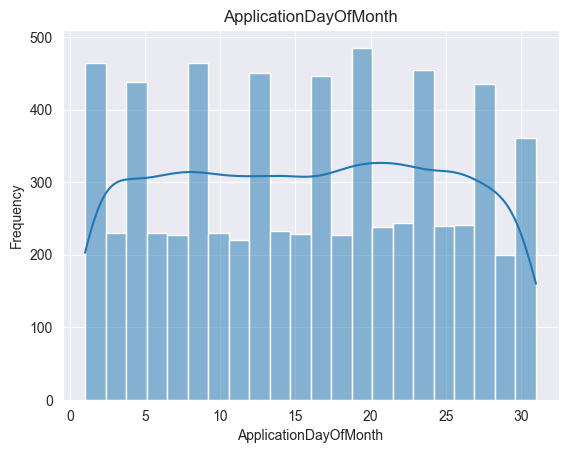

In [1026]:
sns.histplot(df['ApplicationDayOfMonth'], kde=True, stat='frequency')
plt.title('ApplicationDayOfMonth')
plt.show()

#Распределение примерно равномерное, используем min-max нормализацию

df['ApplicationDayOfMonth'] = scaler_min_max.fit_transform(df[['ApplicationDayOfMonth']])
df_test['ApplicationDayOfMonth'] = scaler_min_max.fit_transform(df_test[['ApplicationDayOfMonth']])

Нормализуем Age

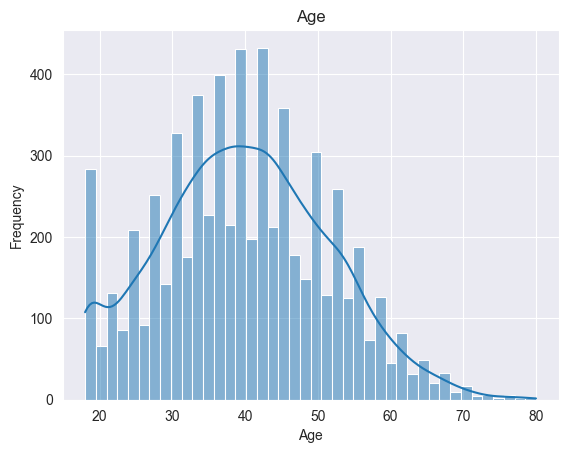

In [1027]:
sns.histplot(df['Age'], kde=True, stat='frequency')
plt.title('Age')
plt.show()

#Распределение по возрастам примерно нормальное - применим z-score нормализацию

df['Age'] = scaler_standard.fit_transform(df[['Age']])
df_test['Age'] = scaler_standard.fit_transform(df_test[['Age']])

Нормализуем CreditScore

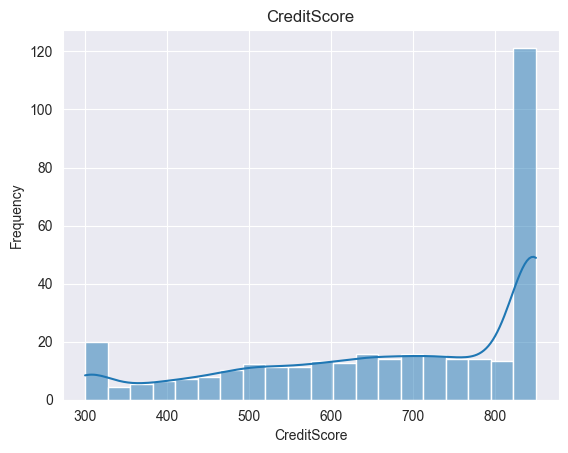

In [1028]:
sns.histplot(df['CreditScore'], kde=True, stat='frequency')
plt.title('CreditScore')
plt.show()

#Здесь применим min-max нормализацию

df['CreditScore'] = scaler_min_max.fit_transform(df[['CreditScore']])
df_test['CreditScore'] = scaler_min_max.fit_transform(df_test[['CreditScore']])

Нормализуем LoanDuration

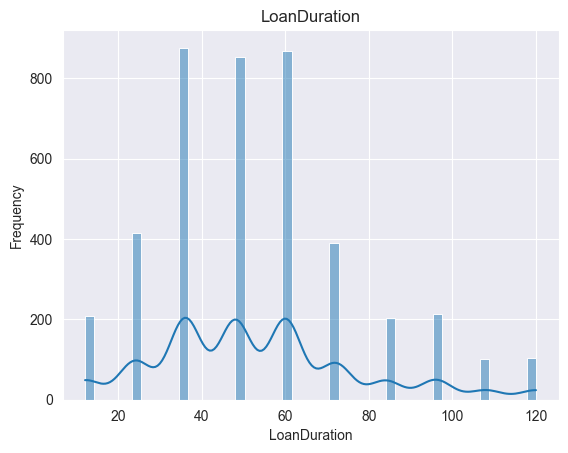

In [1029]:
sns.histplot(df['LoanDuration'], kde=True, stat='frequency')
plt.title('LoanDuration')
plt.show()

#Нормализуем с помощью min-max

df['LoanDuration'] = scaler_min_max.fit_transform(df[['LoanDuration']])
df_test['LoanDuration'] = scaler_min_max.fit_transform(df_test[['LoanDuration']])

Нормализуем NumberOfDependents

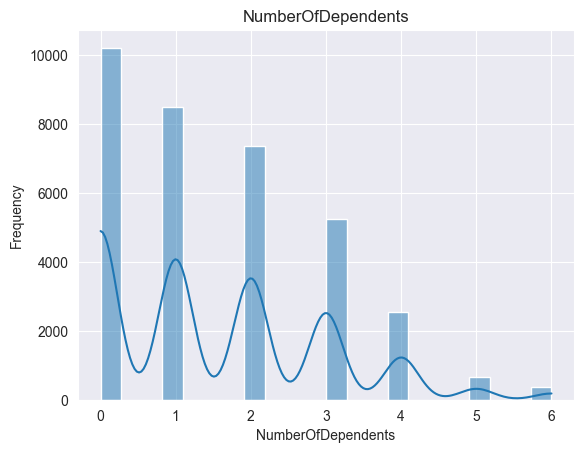

In [1030]:
sns.histplot(df['NumberOfDependents'], kde=True, stat='frequency')
plt.title('NumberOfDependents')
plt.show()

#Используем log-нормализацию, потом z-score

df['NumberOfDependents'] = np.log1p(df['NumberOfDependents'])
df['NumberOfDependents'] = scaler_standard.fit_transform(df[['NumberOfDependents']])

df_test['NumberOfDependents'] = np.log1p(df_test['NumberOfDependents'])
df_test['NumberOfDependents'] = scaler_standard.fit_transform(df_test[['NumberOfDependents']])


Нормализуем MonthlyDebtPayments

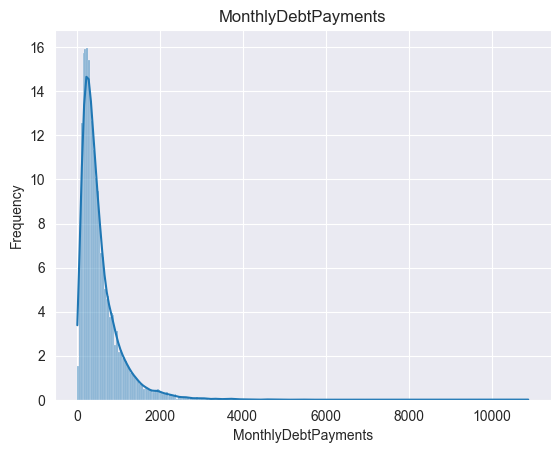

In [1031]:
sns.histplot(df['MonthlyDebtPayments'], kde=True, stat='frequency')
plt.title('MonthlyDebtPayments')
plt.show()

#Здесь сначала логарифмическая, потом z-score нормализация

df['MonthlyDebtPayments'] = np.log1p(df['MonthlyDebtPayments'])
df['MonthlyDebtPayments'] = scaler_standard.fit_transform(df[['MonthlyDebtPayments']])

df_test['MonthlyDebtPayments'] = np.log1p(df_test['MonthlyDebtPayments'])
df_test['MonthlyDebtPayments'] = scaler_standard.fit_transform(df_test[['MonthlyDebtPayments']])

Нормализуем CreditCardUtilizationRate

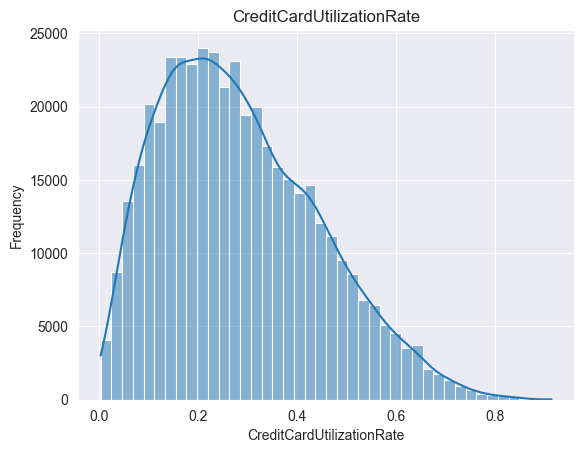

In [1032]:
sns.histplot(df['CreditCardUtilizationRate'], kde=True, stat='frequency')
plt.title('CreditCardUtilizationRate')
plt.show()

#Воспользуемся z-score нормализацией

df['CreditCardUtilizationRate'] = scaler_standard.fit_transform(df[['CreditCardUtilizationRate']])
df_test['CreditCardUtilizationRate'] = scaler_standard.fit_transform(df_test[['CreditCardUtilizationRate']])

Нормализуем NumberOfOpenCreditLines

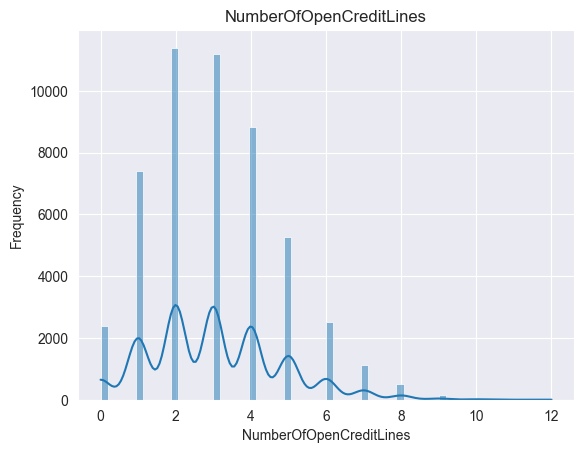

In [1033]:
sns.histplot(df['NumberOfOpenCreditLines'], kde=True, stat='frequency')
plt.title('NumberOfOpenCreditLines')
plt.show()

#Воспользуемся min_max нормализацией

df['NumberOfOpenCreditLines'] = scaler_min_max.fit_transform(df[['NumberOfOpenCreditLines']])
df_test['NumberOfOpenCreditLines'] = scaler_min_max.fit_transform(df_test[['NumberOfOpenCreditLines']])

Нормализуем NumberOfCreditInquiries

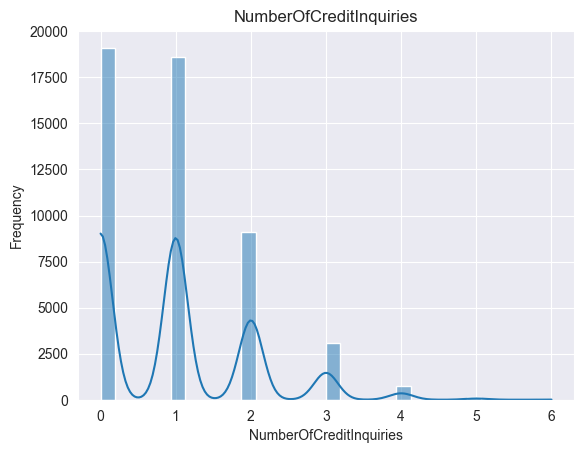

In [1034]:
sns.histplot(df['NumberOfCreditInquiries'], kde=True, stat='frequency')
plt.title('NumberOfCreditInquiries')
plt.show()

#Воспользуемся min_max нормализацией

df['NumberOfCreditInquiries'] = scaler_min_max.fit_transform(df[['NumberOfCreditInquiries']])
df_test['NumberOfCreditInquiries'] = scaler_min_max.fit_transform(df_test[['NumberOfCreditInquiries']])

Нормализуем BankruptcyHistory

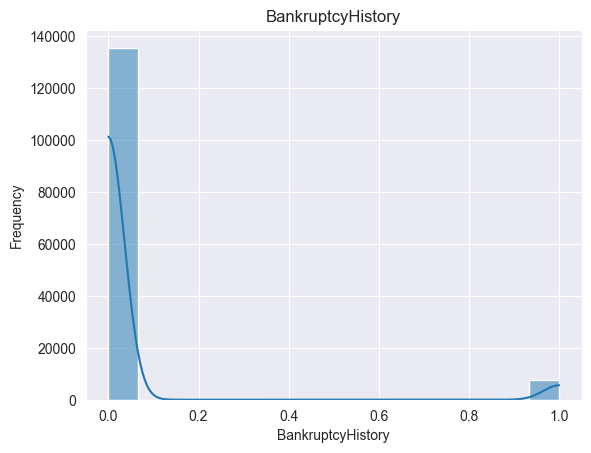

In [1035]:
sns.histplot(df['BankruptcyHistory'], kde=True, stat='frequency')
plt.title('BankruptcyHistory')
plt.show()

#Категориальный признак в нормализации не нуждается

Нормализуем PreviousLoanDefaults

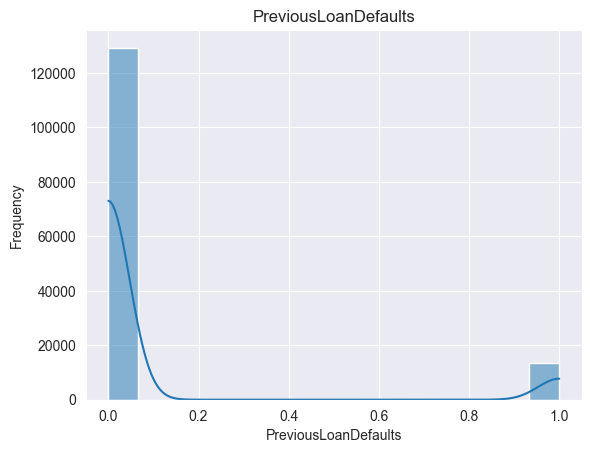

In [1036]:
sns.histplot(df['PreviousLoanDefaults'], kde=True, stat='frequency')
plt.title('PreviousLoanDefaults')
plt.show()

#Категориальный признак в нормализации не нуждается

Нормализуем PaymentHistory

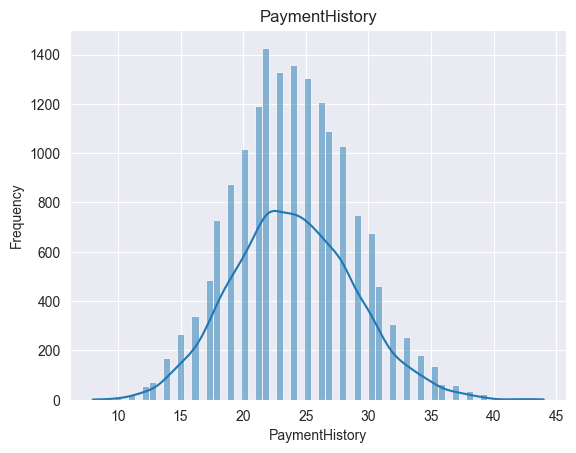

In [1037]:
sns.histplot(df['PaymentHistory'], kde=True, stat='frequency')
plt.title('PaymentHistory')
plt.show()

#Воспользуемся z-score нормализацией

df['PaymentHistory'] = scaler_standard.fit_transform(df[['PaymentHistory']])
df_test['PaymentHistory'] = scaler_standard.fit_transform(df_test[['PaymentHistory']])

Нормализуем LengthOfCreditHistory

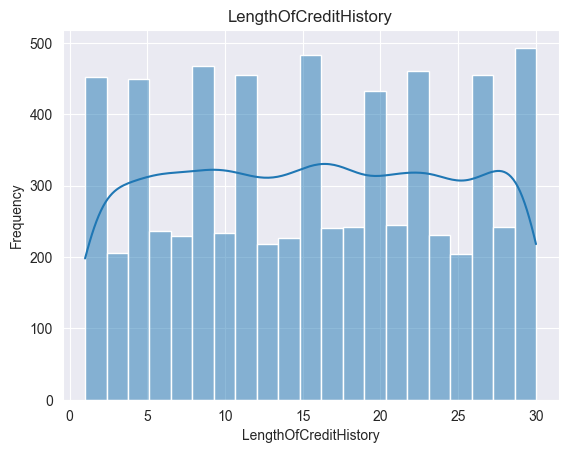

In [1038]:
sns.histplot(df['LengthOfCreditHistory'], kde=True, stat='frequency')
plt.title('LengthOfCreditHistory')
plt.show()

#Воспользуемся min-max нормализацией

df['LengthOfCreditHistory'] = scaler_min_max.fit_transform(df[['LengthOfCreditHistory']])
df_test['LengthOfCreditHistory'] = scaler_min_max.fit_transform(df_test[['LengthOfCreditHistory']])

Нормализуем SavingsAccountBalance

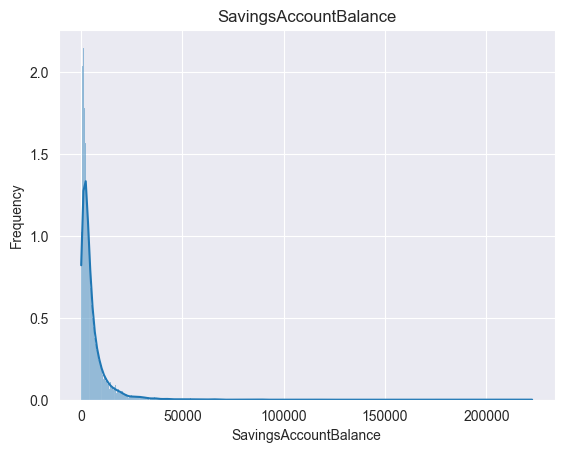

In [1039]:
sns.histplot(df['SavingsAccountBalance'], kde=True, stat='frequency')
plt.title('SavingsAccountBalance')
plt.show()

#Воспользуемся сначала log-нормализацией, потом z-score

df['SavingsAccountBalance'] = np.log1p(df['SavingsAccountBalance'])
df['SavingsAccountBalance'] = scaler_standard.fit_transform(df[['SavingsAccountBalance']])

df_test['SavingsAccountBalance'] = np.log1p(df_test['SavingsAccountBalance'])
df_test['SavingsAccountBalance'] = scaler_standard.fit_transform(df_test[['SavingsAccountBalance']])

Нормализуем CheckingAccountBalance

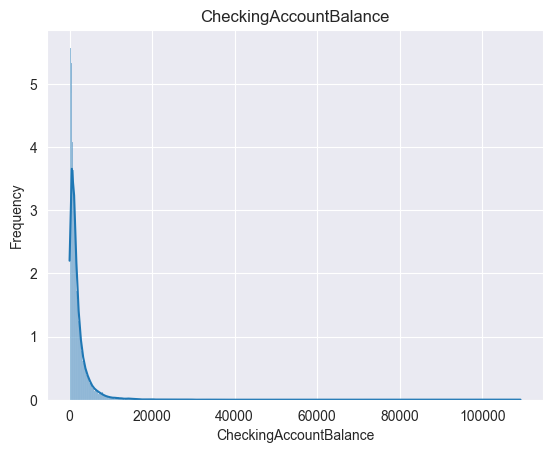

In [1040]:
sns.histplot(df['CheckingAccountBalance'], kde=True, stat='frequency')
plt.title('CheckingAccountBalance')
plt.show()

#Воспользуемся сначала log-нормализацией, потом z-score

df['CheckingAccountBalance'] = np.log1p(df['CheckingAccountBalance'])
df['CheckingAccountBalance'] = scaler_standard.fit_transform(df[['CheckingAccountBalance']])

df_test['CheckingAccountBalance'] = np.log1p(df_test['CheckingAccountBalance'])
df_test['CheckingAccountBalance'] = scaler_standard.fit_transform(df_test[['CheckingAccountBalance']])

Нормализуем TotalLiabilities

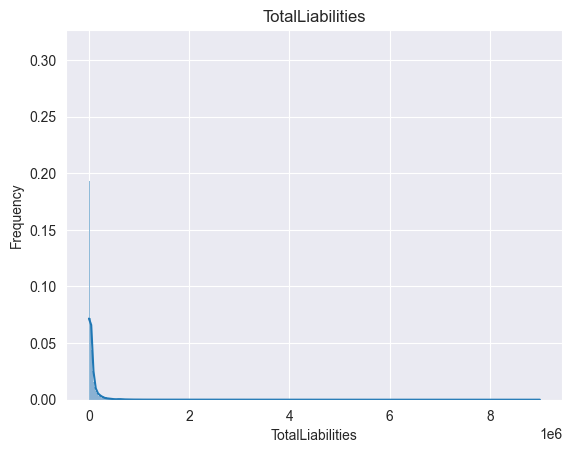

In [1041]:
sns.histplot(df['TotalLiabilities'], kde=True, stat='frequency')
plt.title('TotalLiabilities')
plt.show()

#Воспользуемся сначала log-нормализацией, потом z-score

df['TotalLiabilities'] = np.log1p(df['TotalLiabilities'])
df['TotalLiabilities'] = scaler_standard.fit_transform(df[['TotalLiabilities']])

df_test['TotalLiabilities'] = np.log1p(df_test['TotalLiabilities'])
df_test['TotalLiabilities'] = scaler_standard.fit_transform(df_test[['TotalLiabilities']])

Нормализуем UtilityBillsPaymentHistory

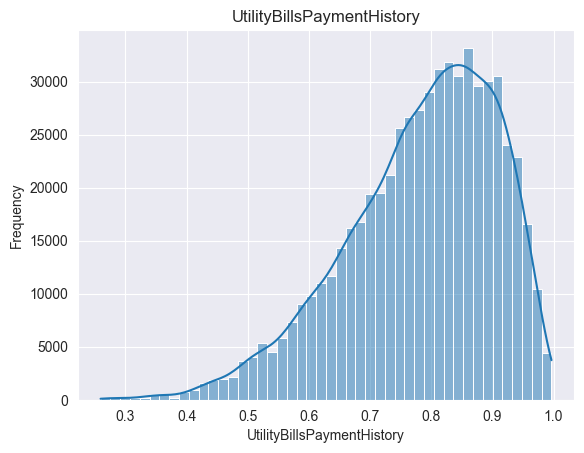

In [1042]:
sns.histplot(df['UtilityBillsPaymentHistory'], kde=True, stat='frequency')
plt.title('UtilityBillsPaymentHistory')
plt.show()

#Воспользуемся z-score нормализацией

df['UtilityBillsPaymentHistory'] = scaler_standard.fit_transform(df[['UtilityBillsPaymentHistory']])
df_test['UtilityBillsPaymentHistory'] = scaler_standard.fit_transform(df_test[['UtilityBillsPaymentHistory']])

Нормализуем JobTenure

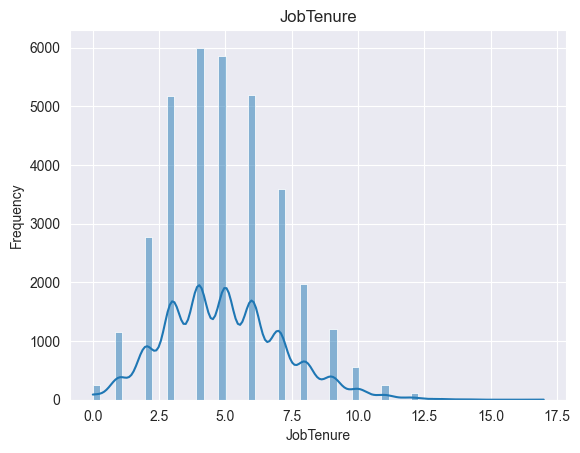

In [1043]:
sns.histplot(df['JobTenure'], kde=True, stat='frequency')
plt.title('JobTenure')
plt.show()

#Воспользуемся z_score нормализацией

df['JobTenure'] = scaler_standard.fit_transform(df[['JobTenure']])
df_test['JobTenure'] = scaler_standard.fit_transform(df_test[['JobTenure']])

Нормализуем NetWorth

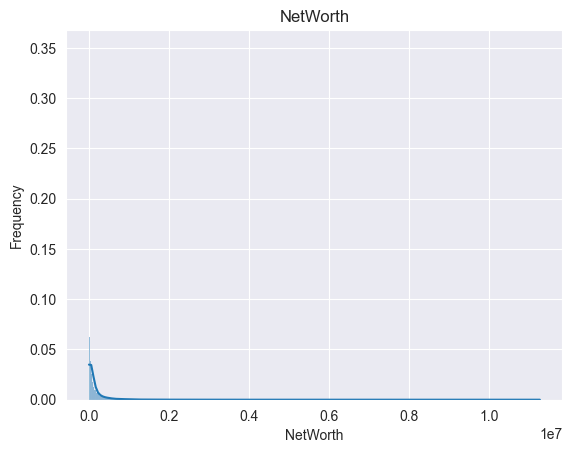

In [1044]:
sns.histplot(df['NetWorth'], kde=True, stat='frequency')
plt.title('NetWorth')
plt.show()

#Сначала воспользуемся log-нормализацией, потом z-score

df['NetWorth'] = np.log1p(df['NetWorth'])
df['NetWorth'] = scaler_standard.fit_transform(df[['NetWorth']])

df_test['NetWorth'] = np.log1p(df_test['NetWorth'])
df_test['NetWorth'] = scaler_standard.fit_transform(df_test[['NetWorth']])

Нормализуем LoanAmount

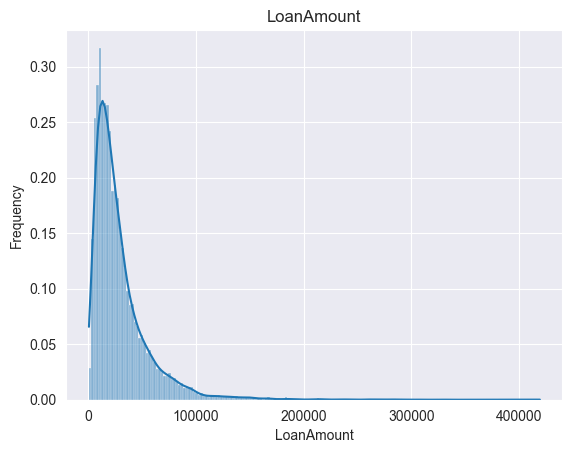

In [1045]:
sns.histplot(df['LoanAmount'], kde=True, stat='frequency')
plt.title('LoanAmount')
plt.show()

#Сначала воспользуемся log-нормализацией, потом z-score

df['LoanAmount'] = np.log1p(df['LoanAmount'])
df['LoanAmount'] = scaler_standard.fit_transform(df[['LoanAmount']])

df_test['LoanAmount'] = np.log1p(df_test['LoanAmount'])
df_test['LoanAmount'] = scaler_standard.fit_transform(df_test[['LoanAmount']])

Нормализация TotalDebtToIncomeRatio

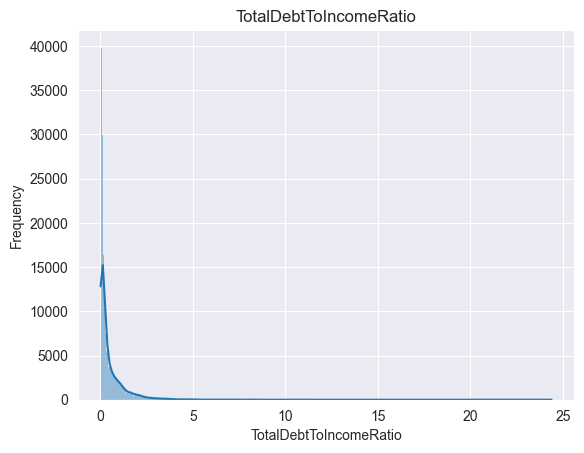

In [1046]:
sns.histplot(df['TotalDebtToIncomeRatio'], kde=True, stat='frequency')
plt.title('TotalDebtToIncomeRatio')
plt.show()

#Воспользуемся сначала log-нормализацией, потом z-score

df['TotalDebtToIncomeRatio'] = np.log1p(df['TotalDebtToIncomeRatio'])
df['TotalDebtToIncomeRatio'] = scaler_standard.fit_transform(df[['TotalDebtToIncomeRatio']])

df_test['TotalDebtToIncomeRatio'] = np.log1p(df_test['TotalDebtToIncomeRatio'])
df_test['TotalDebtToIncomeRatio'] = scaler_standard.fit_transform(df_test[['TotalDebtToIncomeRatio']])

Обработка RiskScore

In [1047]:
print("Risk Score min: ", df['RiskScore'].min())
print("Risk Score max: ", df['RiskScore'].max())
print("Risk Score 50 percentile: ", df['RiskScore'].quantile(0.5))
print("Risk Score 75 percentile: ", df['RiskScore'].quantile(0.75))
print("Risk Score min value count: ", df['RiskScore'].value_counts()[df['RiskScore'].min()])
print("Risk Score max value count: ", df['RiskScore'].value_counts()[df['RiskScore'].max()])

#Наблюдаем выбросы в RiskScore относительно минимальных и максимальных значений, необходимо их отсечь

df = df[(df['RiskScore'] >= -100) & (df['RiskScore'] <= 100)]

print("......................................")
print("New Risk Score min: ", df['RiskScore'].min())
print("New Risk Score max: ", df['RiskScore'].max())
print("New Risk Score 50 percentile: ", df['RiskScore'].quantile(0.5))
print("New Risk Score 75 percentile: ", df['RiskScore'].quantile(0.75))
print("New Risk Score min value count: ", df['RiskScore'].value_counts()[df['RiskScore'].min()])
print("New Risk Score max value count: ", df['RiskScore'].value_counts()[df['RiskScore'].max()])

Risk Score min:  -9999999.0
Risk Score max:  10000000.0
Risk Score 50 percentile:  44.01980013461079
Risk Score 75 percentile:  65.26521654347106
Risk Score min value count:  115
Risk Score max value count:  82
......................................
New Risk Score min:  14.841417296887238
New Risk Score max:  97.59724939432462
New Risk Score 50 percentile:  44.127495744174176
New Risk Score 75 percentile:  65.05940624570566
New Risk Score min value count:  1
New Risk Score max value count:  1


Импортируем необходимые модули из sklearn

In [1048]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

Обучим модель на датасете для трейна

In [1049]:
model_classic = LinearRegression()
model_ridge = Ridge(alpha=0.001)
model_lasso = Lasso(alpha=0.001)
model_elastic_net = ElasticNet(alpha=0.001)

df_test_for_train = df

X = df.drop('RiskScore', axis=1)
Y = df['RiskScore']
model_classic.fit(X, Y)
model_ridge.fit(X, Y)
model_lasso.fit(X, Y)
model_elastic_net.fit(X, Y)

X_test = df_test_for_train.drop('RiskScore', axis=1)
y_test = df_test_for_train['RiskScore']

y_pred_classic = model_classic.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)
y_pred_elastic_net = model_elastic_net.predict(X_test)

print("MSE for classic: ", mean_squared_error(y_test, y_pred_classic))
print("MSE for ridge: ", mean_squared_error(y_test, y_pred_ridge))
print("MSE for lasso: ", mean_squared_error(y_test, y_pred_lasso))
print("MSE for elastic: ", mean_squared_error(y_test, y_pred_elastic_net))

#Получилось добиться примерно одинакового MSE для разных моделей, далее будем использовать Ridge-модель регрессии

MSE for classic:  17.415388141524264
MSE for ridge:  17.415388141798804
MSE for lasso:  17.415835626513207
MSE for elastic:  17.42194272676426


Предсказываем Risk_Score для test.csv

In [1050]:
ids = df_test['ID']
df_test = df_test.drop('ID', axis=1)

predictions = model_ridge.predict(df_test)

result = pd.DataFrame({
    'ID': ids,
    'RiskScore': predictions
})

result.to_csv('D:\PythonLearn\ML-Labs\Lab_02\data\\res.csv', index=False)